

<div class="markdown-google-sans">
  <h1>Build_Model_for_Prediction</h1>
  <p>Building Different Model for Predicting & Evaluating the Accuracy</p>
</div>

<div>
  <h3>Done by- **Kaniz Fatima**, C191284</h3>
</div>


# Installing Requirements-

In [ ]:
!pip install numpy==1.23.1
!pip install pandas==1.4.3
!pip install matplotlib==3.3.2
!pip install seaborn==0.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.19.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.4.3 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.4.3 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.4.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 30.4 MB/s eta 0:00:00
  Prepar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


# Importing Necessary Files

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import re
import warnings
warnings.filterwarnings('ignore')

# Connecting with Drive (/Google Drive)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading from Drive & Checking

In [5]:
data = pd.read_csv('/content/drive/MyDrive/UPDATED_news_share_data_file.csv')
data.shape

(1003, 24)

In [6]:
data.head(3)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,month,day_of_week
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,3,0
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,4,1
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,4,1


In [7]:
df= data.copy()

In [8]:
df['article_length'] = df['text'].apply(len)
df['published_day'] = pd.to_datetime(df['published_date']).dt.day_name()

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler= StandardScaler()
numerical_cols = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'article_length']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Dropping 'title' & 'text' Columns

In [11]:
df = df.drop(['title', 'text', 'data_channel'], axis=1)

# Splitting the Dataset into Features & Target Variable

In [12]:
X= df.drop('shares', axis=1)
y= df['shares']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training & Testing...

In [13]:
x_train['published_date'] = pd.to_datetime(x_train['published_date'])
x_test['published_date'] = pd.to_datetime(x_test['published_date'])
x_train['day_of_week'] = x_train['published_date'].dt.dayofweek
x_train['quarter'] = x_train['published_date'].dt.quarter
x_test['day_of_week'] = x_test['published_date'].dt.dayofweek
x_test['quarter'] = x_test['published_date'].dt.quarter

# Finding out Non-Numeric Columns

In [19]:
non_numeric_columns = x_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index([], dtype='object')


In [20]:
x_train = x_train.drop(non_numeric_columns, axis=1)
x_test = x_test.drop(non_numeric_columns, axis=1)

In [21]:
print("Infinity values in x_train:", np.any(np.isinf(x_train)))
print("Large values in x_train:", np.any(np.abs(x_train) > 1e15))

print("Infinity values in y_train:", np.any(np.isinf(y_train)))
print("Large values in y_train:", np.any(np.abs(y_train) > 1e15))

Infinity values in x_train: False
Large values in x_train: False
Infinity values in y_train: False
Large values in y_train: False


# Replacing Larger values with a Reasonable Value [Training]

In [22]:
x_train[np.abs(x_train) > 1e15] = np.nan
x_train = np.nan_to_num(x_train)

In [24]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Replacing Larger values with a Reasonable Value [Testing]

In [25]:
x_test[np.abs(x_test) > 1e15] = np.nan
x_test = np.nan_to_num(x_test)

In [26]:
x_test_scaled = scaler.transform(x_test)

# Model 1: Linear Regression


In [27]:
# Traing

linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
print("Training R2 score: "+ str(linear_reg.score(x_train,y_train)))

Training R2 score: 0.07146572387858952


In [28]:
# Predicting & Evaluating the Accuracy

preds_lr = linear_reg.predict(x_test)
print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_lr)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_lr)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_lr))))

Test R2 score: -0.0038594436949819233
Test MAE: 6608.183365530749
Test RMSE: 46736.54506987126


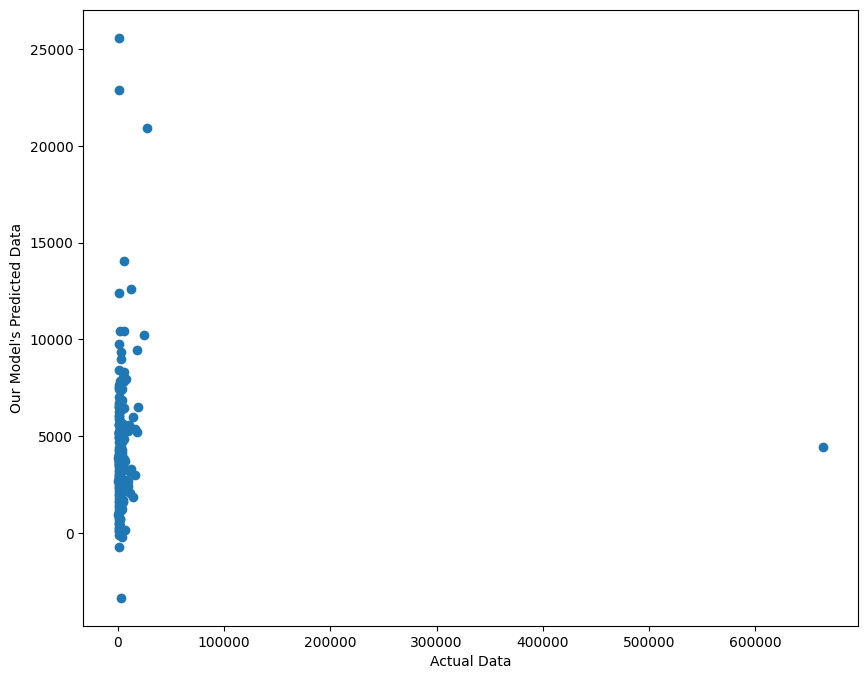

In [30]:
# Plotting the Predicted & Actual Data

plt.figure(figsize=(10,8))
plt.scatter(y_test,preds_lr)
plt.xlabel("Actual Data")
plt.ylabel("Our Model's Predicted Data")
plt.show()

# Model 2: Lasso Regression: (L1 Regularization)

In [34]:
# Training

from sklearn.linear_model import Lasso
las = Lasso()
las.fit(x_train,y_train)
print("Training R2 score: "+ str(las.score(x_train,y_train)))

Training R2 score: 0.07096054254545203


In [35]:
# Predicting & Evaluating the Accuracy

preds_las = las.predict(x_test).reshape(-1,1)
print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_las)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_las)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_las))))

Test R2 score: -0.0031790760123870943
Test MAE: 6577.041932625255
Test RMSE: 46720.7044934425


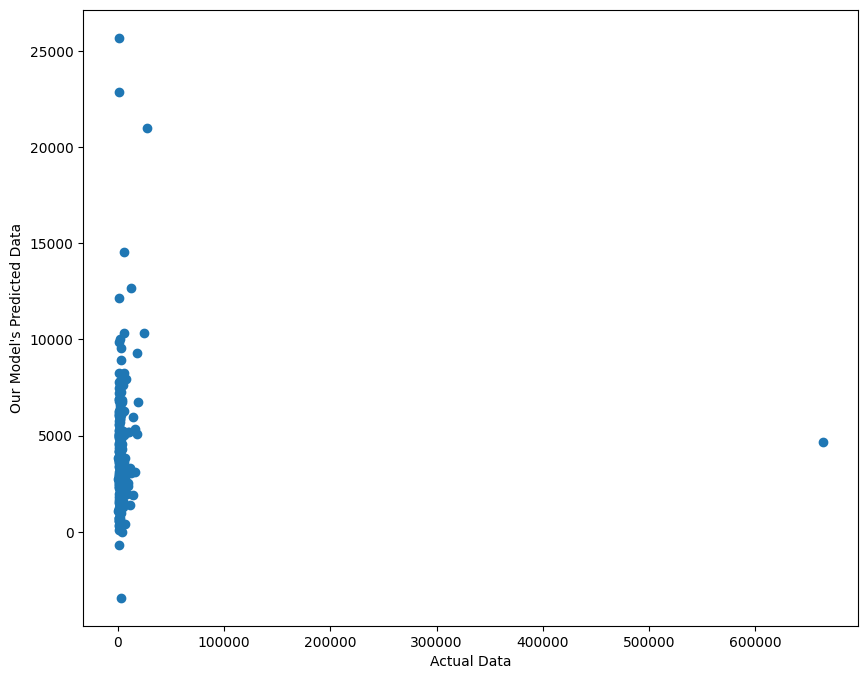

In [36]:
# Plotting the Predicted & Actual Data

plt.figure(figsize=(10,8))
plt.scatter(y_test,preds_las)
plt.xlabel("Actual Data")
plt.ylabel("Our Model's Predicted Data")
plt.show()

# Model 3: Ridge Regression: (L2 Regularization)

In [31]:
# Training

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
print("Training R2 score: "+ str(ridge.score(x_train,y_train)))

Training R2 score: 0.06719103998633602


In [32]:
# Predicting & Evaluating the Accuracy

preds_rid = ridge.predict(x_test)
print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_rid)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_rid)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_rid))))

Test R2 score: -0.002607472779496245
Test MAE: 6537.916624570592
Test RMSE: 46707.392059188525


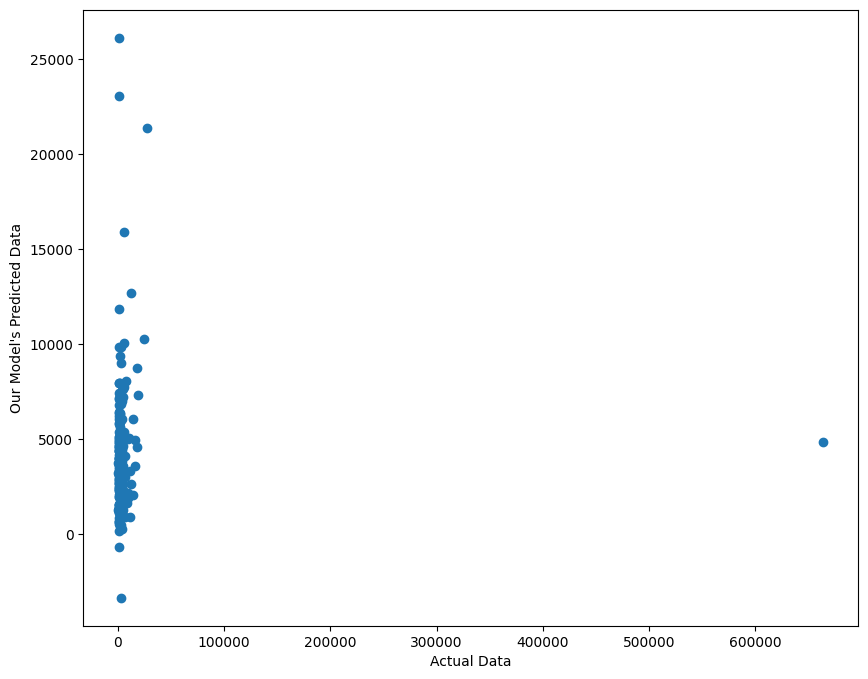

In [33]:
# Plotting the Predicted & Actual Data

plt.figure(figsize=(10,8))
plt.scatter(y_test,preds_rid)
plt.xlabel("Actual Data")
plt.ylabel("Our Model's Predicted Data")
plt.show()

# The End!
Done by- **Kaniz fatima**, C191284